<a href="https://colab.research.google.com/github/Poohi5/cmpe258_homework_0/blob/master/MachineLearningAssg_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [0]:
from google.colab import files
from io import BytesIO
upload = files.upload()

Saving AQ_Boston_Cam-Quincy (1).csv to AQ_Boston_Cam-Quincy (1).csv


In [0]:
df = pd.read_csv('AQ_Boston_Cam-Quincy (1).csv')
df.head()

,['location','city','country','utc','local','parameter','value','unit','latitude','longitude','attribution'],Unnamed: 11,Unnamed: 12
0,['Portsmouth','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','o3','0.035','ppm','43.075371','-70.748017',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
1,['Odiorne State Park','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','o3','0.038','ppm','43.045269','-70.713958',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
2,['Portsmouth','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','pm10','10','µg/m³','43.075371','-70.748017',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
3,['Portsmouth','Boston-Cambridge-Quincy','US','2020-02-09T18:00:00.000Z','2020-02-09T13:00:00-05:00','pm25','4.8','µg/m³','43.075371','-70.748017',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""New Hampshire Dept. of Environmental ..."
4,['LYNN','Boston-Cambridge-Quincy','US','2020-02-09T17:00:00.000Z','2020-02-09T12:00:00-05:00','no2','0.008','ppm','42.474701','-70.971901',"'[{""name"":""US EPA AirNow""","url:""http://www.airnow.gov/""}","{""name"":""Massachusetts Dept. of Environmental ..."


In [0]:
df = df.apply(lambda s:s.str.replace('\'', "").str.replace('[', ""))
df.columns = df.columns.str.strip().str.replace('[', '').str.replace(']', '').str.replace('\'','')
df.drop(df.columns[[10,11,12]], axis=1, inplace=True)
df

,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.035,ppm,43.075371,-70.748017
1,Odiorne State Park,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.038,ppm,43.045269,-70.713958
2,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm10,10,µg/m³,43.075371,-70.748017
3,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm25,4.8,µg/m³,43.075371,-70.748017
4,LYNN,Boston-Cambridge-Quincy,US,2020-02-09T17:00:00.000Z,2020-02-09T12:00:00-05:00,no2,0.008,ppm,42.474701,-70.971901
...,...,...,...,...,...,...,...,...,...,...
9995,Portsmouth,Boston-Cambridge-Quincy,US,2020-01-18T04:00:00.000Z,2020-01-17T23:00:00-05:00,o3,0.032,ppm,43.075371,-70.748017
9996,Chelmsford,Boston-Cambridge-Quincy,US,2020-01-18T04:00:00.000Z,2020-01-17T23:00:00-05:00,o3,0.039,ppm,42.6267,-71.3622
9997,BOSTON-KENMORE,Boston-Cambridge-Quincy,US,2020-01-18T04:00:00.000Z,2020-01-17T23:00:00-05:00,so2,0,ppm,42.3489,-71.097702
9998,E. Milton - Blue Hil,Boston-Cambridge-Quincy,US,2020-01-18T04:00:00.000Z,2020-01-17T23:00:00-05:00,no2,0.004,ppm,42.2117,-71.114403


In [0]:
df['location'] = df['location'].astype('category')
df['location'] = df['location'].cat.codes

df['local'] = df['local'].astype('category')
df['local'] = df['local'].cat.codes

In [0]:
df.head

<bound method NDFrame.head of       location                      city  ...    latitude    longitude
0            7   Boston-Cambridge-Quincy  ...   43.075371   -70.748017
1            6   Boston-Cambridge-Quincy  ...   43.045269   -70.713958
2            7   Boston-Cambridge-Quincy  ...   43.075371   -70.748017
3            7   Boston-Cambridge-Quincy  ...   43.075371   -70.748017
4            5   Boston-Cambridge-Quincy  ...   42.474701   -70.971901
...        ...                       ...  ...         ...          ...
9995         7   Boston-Cambridge-Quincy  ...   43.075371   -70.748017
9996         2   Boston-Cambridge-Quincy  ...     42.6267     -71.3622
9997         0   Boston-Cambridge-Quincy  ...     42.3489   -71.097702
9998         3   Boston-Cambridge-Quincy  ...     42.2117   -71.114403
9999         1   Boston-Cambridge-Quincy  ...   42.329399   -71.082497

[10000 rows x 10 columns]>

In [0]:
df.dtypes

location       int8
city         object
country      object
utc          object
local         int16
parameter    object
value        object
unit         object
latitude     object
longitude    object
dtype: object

In [0]:
table = pd.pivot_table(df, values='value', index=['location', 'local'], columns=['parameter'], aggfunc=np.sum, fill_value=0)

In [0]:
table.reset_index(inplace=True)
table.columns = table.columns.str.strip()

In [0]:
table

parameter,location,local,co,no2,o3,pm10,pm25,so2
0,0,0,0,0.008,0,0,0,0
1,0,1,0,0.009,0,0,0,0
2,0,2,0,0.008,0,0,0,0
3,0,3,0,0.008,0,0,0,0
4,0,4,0,0.007,0,0,0,0
...,...,...,...,...,...,...,...,...
3862,7,536,0,0,0,71,13.8,0.006
3863,7,537,0,0,0.034,66,13,0.004
3864,7,538,0,0,0.036,30,6.8,0.004
3865,7,539,0,0,0.035,16,5.3,0.003


In [0]:
table['co'] = table['co'].astype(float)
table['no2'] = table['no2'].astype(float)
table['o3'] = table['o3'].astype(float)
table['pm10'] = table['pm10'].astype(float)
table['pm25'] = table['pm25'].astype(float)
table['so2'] = table['so2'].astype(float)

In [0]:
table

parameter,location,local,co,no2,o3,pm10,pm25,so2
0,0,0,0.0,0.008,0.000,0.0,0.0,0.000
1,0,1,0.0,0.009,0.000,0.0,0.0,0.000
2,0,2,0.0,0.008,0.000,0.0,0.0,0.000
3,0,3,0.0,0.008,0.000,0.0,0.0,0.000
4,0,4,0.0,0.007,0.000,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...
3862,7,536,0.0,0.000,0.000,71.0,13.8,0.006
3863,7,537,0.0,0.000,0.034,66.0,13.0,0.004
3864,7,538,0.0,0.000,0.036,30.0,6.8,0.004
3865,7,539,0.0,0.000,0.035,16.0,5.3,0.003


In [0]:
table.dtypes

parameter
location      int64
local         int64
co          float64
no2         float64
o3          float64
pm10        float64
pm25        float64
so2         float64
dtype: object

In [0]:
x = table.iloc[:, [0,1,2,3,4,5,6,7]].values
x

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 2.00e+00, 0.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [7.00e+00, 5.38e+02, 0.00e+00, ..., 3.00e+01, 6.80e+00, 4.00e-03],
       [7.00e+00, 5.39e+02, 0.00e+00, ..., 1.60e+01, 5.30e+00, 3.00e-03],
       [7.00e+00, 5.40e+02, 0.00e+00, ..., 1.00e+01, 4.80e+00, 0.00e+00]])

In [0]:
table.iloc[0]

parameter
location    0.000
local       0.000
co          0.000
no2         0.008
o3          0.000
pm10        0.000
pm25        0.000
so2         0.000
Name: 0, dtype: float64

###Birch Clustering [Pooja Patil]

In [0]:
import seaborn as sns
sns.set()
from sklearn.cluster import Birch

In [0]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
brc.fit(x)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
      threshold=1.5)

In [0]:
labels = brc.predict(x)

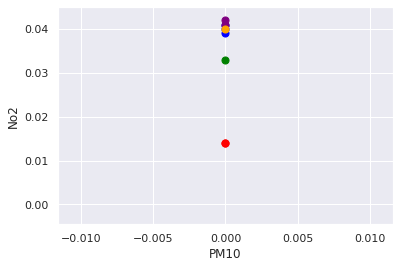

In [0]:
plt.scatter(x[labels==0, 5], x[labels==0, 3], s=50, marker='o', color='red')
plt.scatter(x[labels==1, 5], x[labels==1, 3], s=50, marker='o', color='blue')
plt.scatter(x[labels==2, 5], x[labels==2, 3], s=50, marker='o', color='green')
plt.scatter(x[labels==3, 5], x[labels==3, 3], s=50, marker='o', color='purple')
plt.scatter(x[labels==4, 5], x[labels==4, 3], s=50, marker='o', color='orange')
plt.xlabel("PM10")
plt.ylabel("No2")
plt.show()

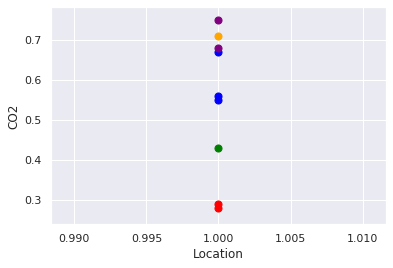

In [60]:
plt.scatter(x[labels==0, 0], x[labels==0, 2], s=50, marker='o', color='red')
plt.scatter(x[labels==1, 0], x[labels==1, 2], s=50, marker='o', color='blue')
plt.scatter(x[labels==2, 0], x[labels==2, 2], s=50, marker='o', color='green')
plt.scatter(x[labels==3, 0], x[labels==3, 2], s=50, marker='o', color='purple')
plt.scatter(x[labels==4, 0], x[labels==4, 2], s=50, marker='o', color='orange')
plt.xlabel("Location")
plt.ylabel("CO2")
plt.show()

###K-means  [Pooja Patil]

centroids [[ 4.15353535 13.38080808]
 [ 2.28552515  0.109797  ]
 [ 4.88969259  5.24403255]]


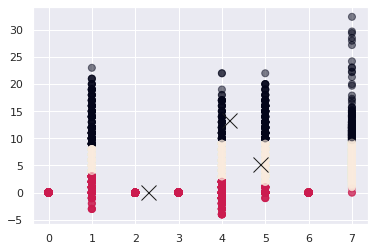

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#points_n = 200
clusters_n = 3
iteration_n = 100

#points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
points = table.iloc[:,[0,6]].values
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(
      tf.gather(points, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1]))

new_centroids = tf.concat(means, 0)

update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

data_tf = tf.convert_to_tensor(points, np.float32)

with tf.Session() as sess:
  sess.run(init)
  for step in range(iteration_n):
    [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, data_tf, assignments])
    
  print("centroids", centroid_values)

plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()